YBIGTA 2021-2 ÍµêÏú°ÏÑ∏ÏÖò

# RNN Í≥ºÏ†ú : Îâ¥Ïä§ ÌÜ†ÌîΩ 7Ï§ëÎ∂ÑÎ•òÌïòÍ∏∞

**Í∞ïÏùòÏûê : ÌïúÏßÄÏòÅ**

<br>

Ï£ºÏöî Í≥ºÏ†úÎäî ÌÜ†ÌÅ∞Ìôî, Ï†ïÏàòÏù∏ÏΩîÎî©, Ìå®Îî©, Î™®Îç∏ÎßÅ(Vanila RNN or LSTM, Î™®Îç∏ÎßÅ Îî¥Í±∏Î°ú ÌïòÏãúÎ†§Î©¥ ÌïòÏÖîÎèÑ Îê©ÎãàÎã§!)ÏûÖÎãàÎã§!

Ï£ºÏÑùÏ≤òÎ¶¨Ìï¥ ÎÜìÏùÄ Í≥≥(Q1~Q7)ÏùÑ Ï±ÑÏõåÏÑú ÏôÑÏÑ±Ìï¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§.

Ïò§Îäò Ïã§ÏäµÌïú ÏΩîÎìúÏóê Í±∞Ïùò ÎãµÏù¥ ÏûàÍ≥†, Î™®Îç∏ÎßÅ Î∂ÄÎ∂ÑÏùÄ Ïò§Îäò Ïã§ÏäµÏùÑ ÏùëÏö©ÌïòÎ©¥ Îê©ÎãàÎã§! Ï∞∏Í≥†Ìï¥ÏÑú ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî~ ÌôîÏù¥ÎßÅ!


In [7]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import Adam

from keras.utils import np_utils

import warnings 
warnings.filterwarnings(action='ignore')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_data.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_data.csv")

In [10]:
train

index                               title  topic_idx
0          0            Ïù∏Ï≤ú‚ÜíÌïÄÎûÄÎìú Ìï≠Í≥µÍ∏∞ Í≤∞Ìï≠‚Ä¶Ìú¥Í∞ÄÏ≤† Ïó¨ÌñâÍ∞ù Î∂ÑÌÜµ          4
1          1      Ïã§Î¶¨ÏΩòÎ∞∏Î¶¨ ÎÑòÏñ¥ÏÑúÍ≤†Îã§‚Ä¶Íµ¨Í∏Ä 15Ï°∞Ïõê Îì§Ïó¨ ÁæéÏ†ÑÏó≠ Í±∞Ï†êÌôî          4
2          2      Ïù¥ÎûÄ Ïô∏Î¨¥ Í∏¥Ïû•ÏôÑÌôî Ìï¥Í≤∞Ï±ÖÏùÄ ÎØ∏Íµ≠Ïù¥ Í≤ΩÏ†úÏ†ÑÏüÅ Î©àÏ∂îÎäî Í≤É          4
3          3    NYT ÌÅ¥Î¶∞ÌÑ¥ Ï∏°Í∑ºÈüìÍ∏∞ÏóÖ ÌäπÏàòÍ¥ÄÍ≥Ñ Ï°∞Î™Ö‚Ä¶Í≥µÍ≥º ÏÇ¨ ÎßûÎ¨ºÎ†§Ï¢ÖÌï©          4
4          4           ÏãúÏßÑÌïë Ìä∏ÎüºÌîÑÏóê Ï§ëÎØ∏ Î¨¥Ïó≠ÌòëÏÉÅ Ï°∞ÏÜç ÌÉÄÍ≤∞ Ìù¨Îßù          4
...      ...                                 ...        ...
45649  45649        KBÍ∏àÏúµ ÎØ∏Íµ≠ IB Ïä§Ìã∞Ìé†Í≥º Ï†úÌú¥‚Ä¶ÏÑ†ÏßÑÍµ≠ ÏãúÏû• Í≥µÎûµ          1
45650  45650     1Î≥¥ ÏÑúÏö∏ÏãúÍµêÏú°Ï≤≠ Ïã†Ï¢ÖÏΩîÎ°úÎÇò ÌôïÏÇ∞Ïóê Í∞úÌïô Ïó∞Í∏∞¬∑Ìú¥ÏóÖ Í≤ÄÌÜ†          2
45651  45651         Í≤åÏãúÌåê ÌÇ§ÏõÄÏ¶ùÍ∂å 2020 ÌÇ§ÏõÄ ÏòÅÏõÖÏ†Ñ Ïã§Ï†ÑÌà¨ÏûêÎåÄÌöå          1
45652  45652                   ÎãµÎ≥ÄÌïòÎäî Î∞∞Í∏∞Îèô Íµ≠Î¶ΩÏ§ëÏïôÎ∞ïÎ¨ºÍ¥ÄÏû•          2
45653  45653  2020 ÌïúÍµ≠Ïù∏ÌÑ∞ÎÑ∑Í∏∞ÏûêÏÉÅ ÏãúÏÉÅÏãù ÎÇ¥Îã¨ 1Ïùº Í∞úÏµú‚Ä¶ÌäπÎ≥ÑÏÉÅ ÍπÄÏÑ±ÌõÑ          2

[45654 rows x 3 columns]

### eda
EDAÎäî ÌôïÏù∏Îßå ÌïòÏãúÍ≥† ÎÑòÏñ¥Í∞ÄÏãúÎ©¥ Îê©ÎãàÎã§~

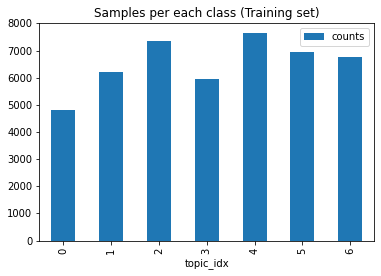

In [11]:
# ÏûëÍ∞ÄÎ≥Ñ Î∂ÑÌè¨ÎèÑ ÌôïÏù∏ 
train.groupby(train.topic_idx).size().reset_index(name="counts").plot.bar(x='topic_idx',title="Samples per each class (Training set)")

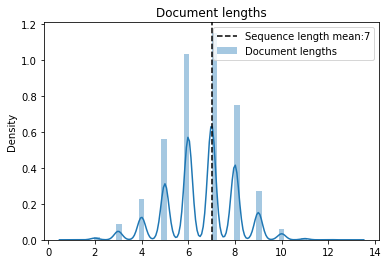

 Í∞ÄÏû• Í∏¥ Î¨∏Ïû•ÏùÄ 13 Í∞úÏùò Îã®Ïñ¥Î•º, Í∞ÄÏû• ÏßßÏùÄ Î¨∏Ïû•ÏùÄ 1 Í∞úÏùò Îã®Ïñ¥Î•º Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§.


In [12]:
# Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨ÎèÑ ÌôïÏù∏
train['doc_len'] = train.title.apply(lambda words: len(words.split()))

def plot_doc_lengths(dataframe):
    mean_seq_len = np.round(dataframe.doc_len.mean()).astype(int)
    sns.distplot(tuple(dataframe.doc_len), hist=True, kde=True, label='Document lengths')
    plt.axvline(x=mean_seq_len, color='k', linestyle='--', label=f'Sequence length mean:{mean_seq_len}')
    plt.title('Document lengths')
    plt.legend()
    plt.show()
    print(f" Í∞ÄÏû• Í∏¥ Î¨∏Ïû•ÏùÄ {train['doc_len'].max()} Í∞úÏùò Îã®Ïñ¥Î•º, Í∞ÄÏû• ÏßßÏùÄ Î¨∏Ïû•ÏùÄ {train['doc_len'].min()} Í∞úÏùò Îã®Ïñ¥Î•º Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§.")

plot_doc_lengths(train)

### ÌÖçÏä§Ìä∏ Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨
ÏΩîÎìú Ïã§ÌñâÎßå Ìï¥Ï£ºÏãúÍ≥† ÎÑòÏñ¥Í∞ÄÏãúÎ©¥ Îê©ÎãàÎã§~

In [13]:
train.drop_duplicates(subset=['title'], inplace=True) # Ï§ëÎ≥µÍ∞í ÏûàÎã§Î©¥ Ï†úÍ±∞

In [14]:
train = train.dropna(how = 'any') # Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî Ìñâ Ï†úÍ±∞
print(train.isnull().values.any()) # Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏

False


In [15]:
train['title'] = train['title'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
# ÌïúÍ∏ÄÍ≥º Í≥µÎ∞±ÏùÑ Ï†úÏô∏ÌïòÍ≥† Î™®Îëê Ï†úÍ±∞
train[:5]

index                           title  topic_idx  doc_len
0      0          Ïù∏Ï≤úÌïÄÎûÄÎìú Ìï≠Í≥µÍ∏∞ Í≤∞Ìï≠Ìú¥Í∞ÄÏ≤† Ïó¨ÌñâÍ∞ù Î∂ÑÌÜµ          4        5
1      1      Ïã§Î¶¨ÏΩòÎ∞∏Î¶¨ ÎÑòÏñ¥ÏÑúÍ≤†Îã§Íµ¨Í∏Ä Ï°∞Ïõê Îì§Ïó¨ Ï†ÑÏó≠ Í±∞Ï†êÌôî          4        6
2      2  Ïù¥ÎûÄ Ïô∏Î¨¥ Í∏¥Ïû•ÏôÑÌôî Ìï¥Í≤∞Ï±ÖÏùÄ ÎØ∏Íµ≠Ïù¥ Í≤ΩÏ†úÏ†ÑÏüÅ Î©àÏ∂îÎäî Í≤É          4        8
3      3      ÌÅ¥Î¶∞ÌÑ¥ Ï∏°Í∑ºÍ∏∞ÏóÖ ÌäπÏàòÍ¥ÄÍ≥Ñ Ï°∞Î™ÖÍ≥µÍ≥º ÏÇ¨ ÎßûÎ¨ºÎ†§Ï¢ÖÌï©          4        7
4      4       ÏãúÏßÑÌïë Ìä∏ÎüºÌîÑÏóê Ï§ëÎØ∏ Î¨¥Ïó≠ÌòëÏÉÅ Ï°∞ÏÜç ÌÉÄÍ≤∞ Ìù¨Îßù          4        7

In [16]:

# ÌïúÍ∏ÄÎßå ÎÇ®Í∏¥ Ïù¥ÌõÑ, Îπà Í∞íÏù¥ Îêú ÌñâÏùÑ Ï†úÍ±∞Ìï¥Ï§çÏãúÎã§.
train['title'] = train['title'].str.replace('^ +', "") # white space Îç∞Ïù¥ÌÑ∞Î•º empty valueÎ°ú Î≥ÄÍ≤Ω
train['title'].replace('', np.nan, inplace=True)
train = train.dropna(how = 'any')

In [17]:
# test dataÏóê ÎåÄÌï¥ÏÑúÎèÑ Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ ÏàòÌñâÌï¥Ï§çÎãàÎã§.
test.drop_duplicates(subset = ['title'], inplace=True) # title Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏù∏ ÎÇ¥Ïö©Ïù¥ ÏûàÎã§Î©¥ Ï§ëÎ≥µ Ï†úÍ±∞
test['title'] = test['title'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","") # Ï†ïÍ∑ú ÌëúÌòÑÏãù ÏàòÌñâ
test['title'] = test['title'].str.replace('^ +', "") # Í≥µÎ∞±ÏùÄ empty Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω
test['title'].replace('', np.nan, inplace=True) # Í≥µÎ∞±ÏùÄ Null Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω
test = test.dropna(how='any') # Null Í∞í Ï†úÍ±∞
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò :',len(test))

Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò : 9131


### Î≥∏ Í≥ºÏ†ú ÏãúÏûë! Q1~Q7ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî!

In [18]:
!pip3 install konlpy
from konlpy.tag import Okt

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.4 MB 7.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 86 kB 5.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 448 kB 52.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [19]:
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']
okt = Okt()

In [20]:
# Ìä∏Î†àÏù∏Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÌôîÌï¥Ï£ºÏÑ∏Ïöî!
X_train = []
for sentence in train['title']:
    temp_X = okt.morphs(sentence, stem=True) 
    temp_X = [word for word in temp_X if not word in stopwords] 
    X_train.append(temp_X)

In [21]:
X_test = []
for sentence in test['title']:
    temp_X = okt.morphs(sentence, stem=True) 
    temp_X = [word for word in temp_X if not word in stopwords] 
    X_test.append(temp_X)

In [22]:
vocab_size =2000 # vocabsizeÎäî 2000ÏúºÎ°ú ÌïòÍ≤†ÏäµÎãàÎã§!
tokenizer = Tokenizer(vocab_size)
# Q4. fit_on_texts()Î•º Ïù¥Ïö©ÌïòÏó¨ Í∞Å Îã®Ïñ¥Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÎ•º Î∂ÄÏó¨ÌïòÍ≥† Îã®Ïñ¥ ÏßëÌï©ÏùÑ ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî~
tokenizer.fit_on_texts(X_train)

In [23]:
# Q5. texts_to_sequence()Î•º ÌÜµÌï¥ X_trainÍ≥º X_testÏùò ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î•º Ïà´Ïûê ÏãúÌÄÄÏä§Î°ú Î∞îÍøîÏ§çÏãúÎã§!
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
################################################################################

y_train = np.array(train['topic_idx'])
y_train = to_categorical(y_train, 7)

Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 15
Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 5.935360217291306


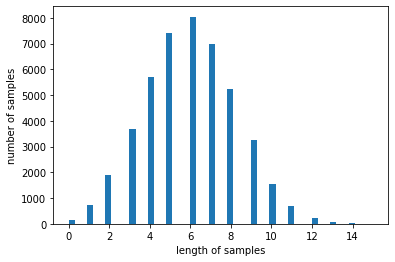

In [24]:
#Î¶¨Î∑∞ Í∏∏Ïù¥ Î∂ÑÌè¨ Î≥¥Í∏∞
print('Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :',max(len(l) for l in X_train))
print('Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
max_len = 15

##### Q6. pad_sequences Ìï®Ïàò Ïù¥Ïö©Ìï¥ÏÑú Ìå®Îî© ÏßÑÌñâÌï¥Ï£ºÏÑ∏Ïöî! max_lenÎèÑ ÏßÄÏ†ïÌï¥Ï£ºÏÑ∏Ïöî! ######
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [26]:
embedding_dim = 200 #vocab_sizeÏôÄ max_len ÌååÎùºÎØ∏ÌÑ∞ ÏÑ∏ÌåÖÏùÄ ÏúÑÏóêÏÑú Ïù¥ÎØ∏ ÏßÑÌñâÌñàÏäµÎãàÎã§! Ïù¥Ïö©Ìï¥ÏÑú Î™®Îç∏ÎßÅ Ìï¥Ï£ºÏÑ∏Ïöî~

#################### Q7 ####################
# lstm/vanila RNN, ÌòπÏùÄ Îã§Î•∏ Î™®Îç∏ÎèÑ ÏÉÅÍ¥Ä ÏóÜÏäµÎãàÎã§! import Ìï† Í±∞ ÌïòÏãúÍ≥†, Î™®Îç∏ÎßÅÏùÑ Ìï¥Ï£ºÏÑ∏Ïöî!
# ÌûåÌä∏: ÎßàÏßÄÎßâ dense Ï∏µÏóêÏÑú Ï∂úÎ†• Îâ¥Îü∞ Ïàò, ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º Ïûò ÏÑ§Ï†ïÌïòÏãúÎäîÍ≤å Ï§ëÏöîÌï©ÎãàÎã§!
# ÌûåÌä∏2: vocab_sizeÏôÄ max_len, embedding_dim ÌååÎùºÎØ∏ÌÑ∞ Ïù¥Ïö©Ìï¥ÏÑú Î™®Îç∏ÎßÅ Ìï¥Ï£ºÏÑ∏Ïöî~
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 200, input_length=max_len)) 
model.add(LSTM(128))
model.add(Dense(7, activation='sigmoid'))


In [27]:
#ÌïôÏäµÏùÑ ÏßÑÌñâÏãúÏºúÎ¥ÖÏãúÎã§! ÏÖÄÏùÑ Ïã§ÌñâÏãúÏºúÏ£ºÏÑ∏Ïöî! epoch, validation_splitÏùÄ ÏõêÌïòÏãúÎäîÎåÄÎ°ú Î∞îÍæ∏ÏÖîÎèÑ ÎêòÍ≥†, Early Stopping ÏùëÏö©ÌïòÏÖîÎèÑ Îê©ÎãàÎã§!
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es,mc], batch_size=100, validation_split=0.25)

Epoch 1/10
343/343 [==============================] - 13s 18ms/step - loss: 0.9103 - acc: 0.6823 - val_loss: 0.9034 - val_acc: 0.6721

Epoch 00001: val_acc improved from -inf to 0.67207, saving model to best_model.h5
Epoch 2/10
343/343 [==============================] - 6s 16ms/step - loss: 0.5570 - acc: 0.8116 - val_loss: 0.7680 - val_acc: 0.7315

Epoch 00002: val_acc improved from 0.67207 to 0.73147, saving model to best_model.h5
Epoch 3/10
343/343 [==============================] - 5s 15ms/step - loss: 0.4990 - acc: 0.8272 - val_loss: 0.8194 - val_acc: 0.7045

Epoch 00003: val_acc did not improve from 0.73147
Epoch 4/10
343/343 [==============================] - 5s 16ms/step - loss: 0.4651 - acc: 0.8371 - val_loss: 0.8029 - val_acc: 0.7130

Epoch 00004: val_acc did not improve from 0.73147
Epoch 5/10
343/343 [==============================] - 5s 16ms/step - loss: 0.4362 - acc: 0.8456 - val_loss: 0.8182 - val_acc: 0.7204

Epoch 00005: val_acc did not improve from 0.73147
Epoch 6/10
3

<function matplotlib.pyplot.show>

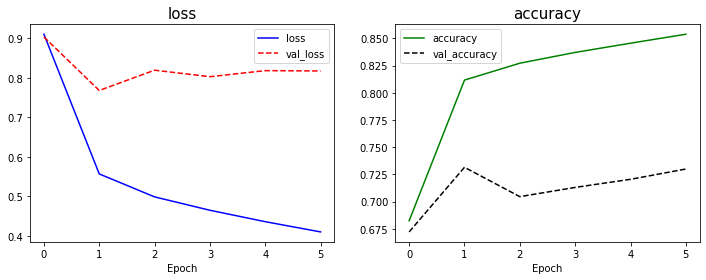

In [28]:
#ÏóêÎü¨ ÏóÜÏù¥, ÏõêÌïòÎäî Î™®Îç∏Î°ú ÎßàÏßÄÎßâ epochÍπåÏßÄ ÌïôÏäµÏùÑ ÏôÑÎ£åÏãúÏºúÏ£ºÏãúÍ≥† Ïù¥ ÏÖÄÏùÑ Ïã§ÌñâÏãúÏºúÏ£ºÏÑ∏Ïöî! ÏóêÎü¨ ÏóÜÏù¥ Ìï¥ÎãπÏÖÄÍπåÏßÄ Ïã§ÌñâÏãúÏºúÏ£ºÏãúÎ©¥ ÏÑ±Í≥µÏûÖÎãàÎã§~

# Î™®Îç∏ ÌïôÏäµ Í≤∞Í≥º ÌôïÏù∏
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('loss', fontsize= 15)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy', fontsize= 15)
plt.plot(history.history['acc'], 'g-', label='accuracy')
plt.plot(history.history['val_acc'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

------

**ÏàòÍ≥†ÌïòÏÖ®ÏäµÎãàÎã§ü•∞ü•∞ü•∞**